# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# import Machine learning Model & libraries

# To scale & split the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
#loading the dataset
df = pd.read_csv(r'C:\Users\tarachand.sahoo\Personal\DataScience\MIT Course\Elective Project\ExtraaLearn.csv')

# Keep back-up of the original data

bk_df = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [4]:
df.shape

(4612, 15)

In [5]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [6]:
#check for duplicate values
df.duplicated().sum()

0

In [7]:
#check for column unique values
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [8]:
#check for null values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observations**
- There are **4612 observations & 15 Columns** in the dataset.
- All the columns have 4612 non-null values, so **No duplicate values** or **Null** values found
- age, website_visits, time_spent_on_website, page_views_per_visit & status are **numerical columns.**
- ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels & referral are **categorical columns** 
- ID is unique identifier for each lead, and it would not add any value further analysis so it can **be dropped**

**Let's drop the ID column** and define lists for numerical and categorical columns to explore them separately.


In [9]:
# Dropping the ID columns
df = df.drop(['ID'] , axis = 1)

In [10]:
# Creating numerical columns

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# creating Categorical columns
cat_cols= df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Coluns: ',num_cols)
print('Categorical Columns: ',cat_cols)

Numerical Coluns:  ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
Categorical Columns:  ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate analysis of numerical columns

In [11]:
# Checking summary statistics for the numerical columns

df[num_cols].describe().T 

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
- **Average age of customers is around ~46 years.** It has a high range, from 18 years to 63, indicating good age diversity.
- **At least 50% of the customer visit website 3 times**. There are some customers with a high website visit count of 30 times.
- **The average time spent in seconds is ~724. i.e. ~12 minutes** It has a high range values from 0 to 2537 secs, i.e.42 minutes.
- On a average customers **view 3 pages** per visit
- **~30% of customers end up being paid customers**. There is a potential of attracting another 70% potential customers.

In [12]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

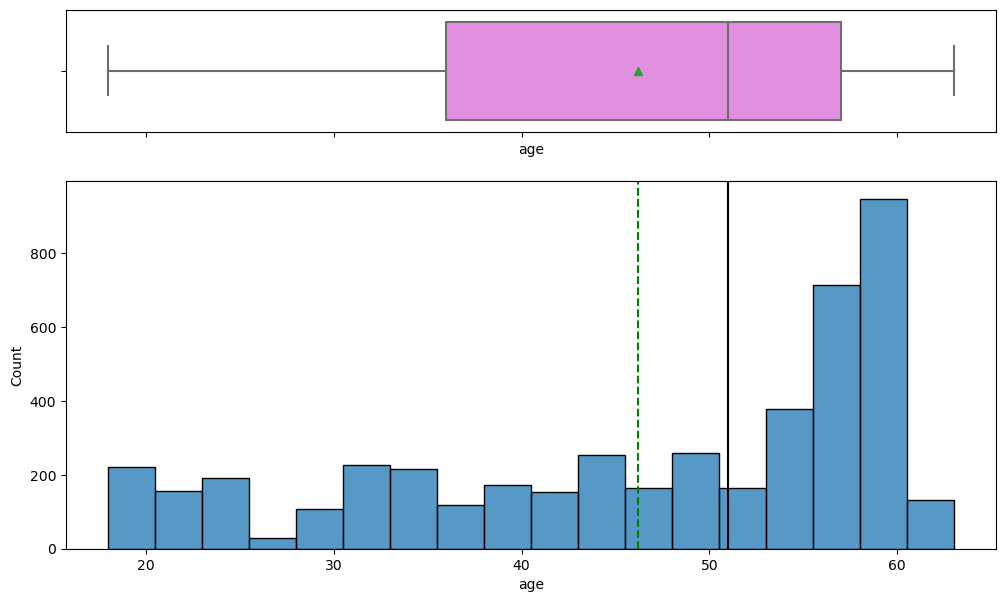

In [13]:
# Age
histogram_boxplot(df[num_cols],df[num_cols].columns[0])

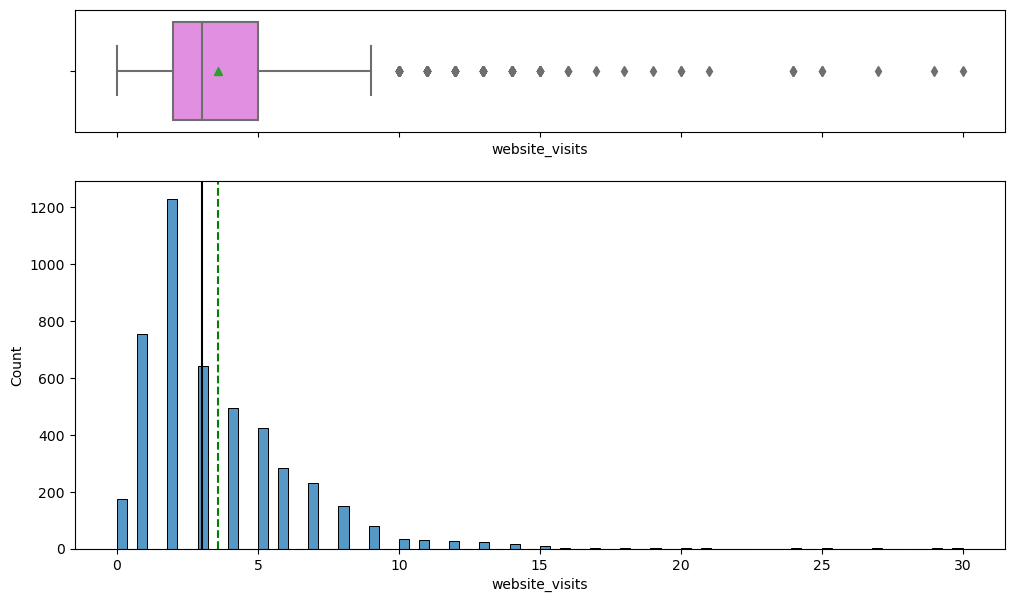

In [14]:
# Website Visits
histogram_boxplot(df[num_cols],df[num_cols].columns[1])


In [15]:
# To check how many leads have not visited web-site or had any 
df[df["website_visits"] == 0].shape

(174, 14)

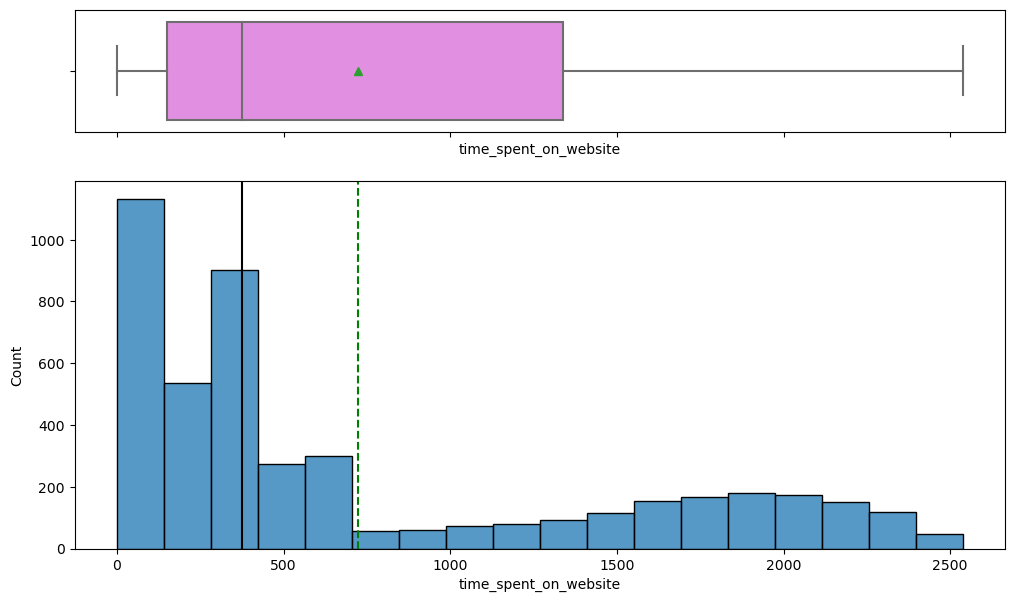

In [16]:
# Time spent on website
histogram_boxplot(df[num_cols],df[num_cols].columns[2])

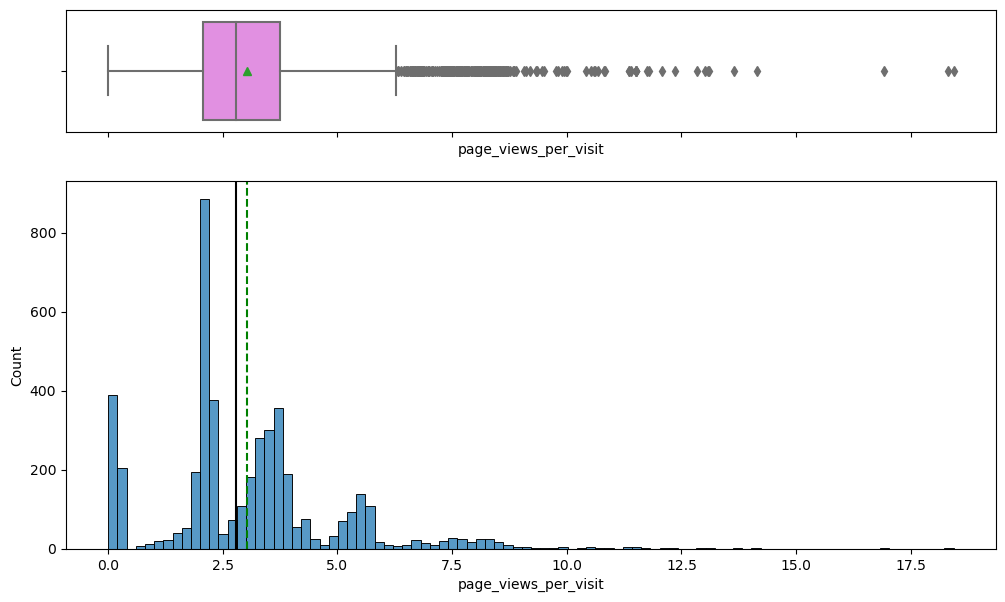

In [17]:
# Page views per visit
histogram_boxplot(df[num_cols],df[num_cols].columns[3])

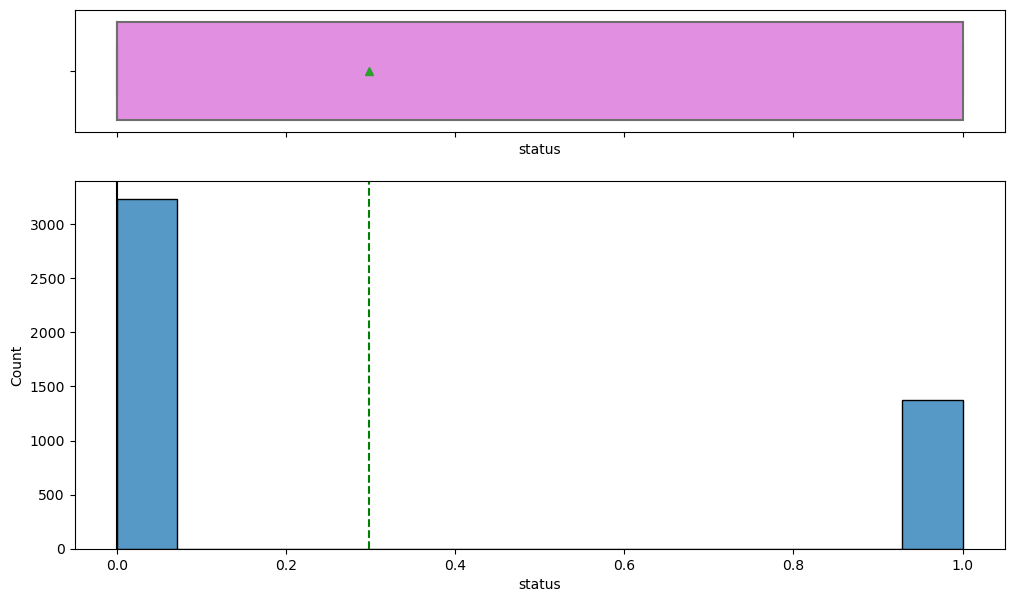

In [18]:
# Age
histogram_boxplot(df[num_cols],df[num_cols].columns[4])

**Observations:

- **Age data is left skewed,** meaning majority users age between 53 to 63. 
- **website visit data is right skewed**. meaning majority users visit website between 0 to 8 times.(outliers present)
- **The average time spent is skewed to the right** meaning majority userss spend less time.
- **page views per visit is also right skewed** meaning average page view per visit is less.(outliers present)
- **~30% of customers end up being paid customers**. There is a potential of attracting another 70% potential customers.


## Univariate analysis for categorical columns

In [19]:
# Printing the number of occurrences of each unique value in each categorical column
for i in cat_cols:

    print(df[i].value_counts(normalize = True))

    print('*' * 50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
**************************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
**************************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
**************************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
**************************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
**************************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
**************************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
**************************************************
No     0.84

In [20]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot


In [21]:
print('Numerical Columns: ',num_cols)
print('Categorical Columns: ',cat_cols)

Numerical Columns:  ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
Categorical Columns:  ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


## Analyze key categorical columns

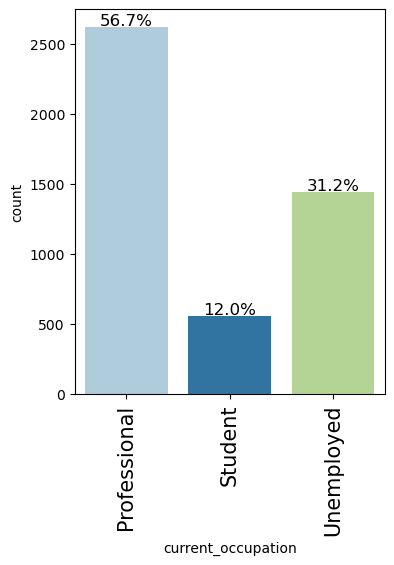

In [22]:
labeled_barplot(df,'current_occupation', perc=True)

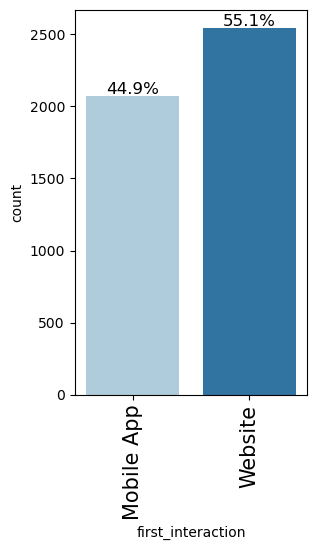

In [23]:
labeled_barplot(df,'first_interaction', perc=True)

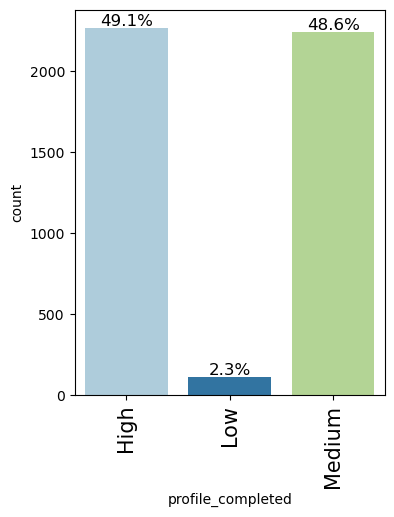

In [24]:
labeled_barplot(df,'profile_completed', perc=True)

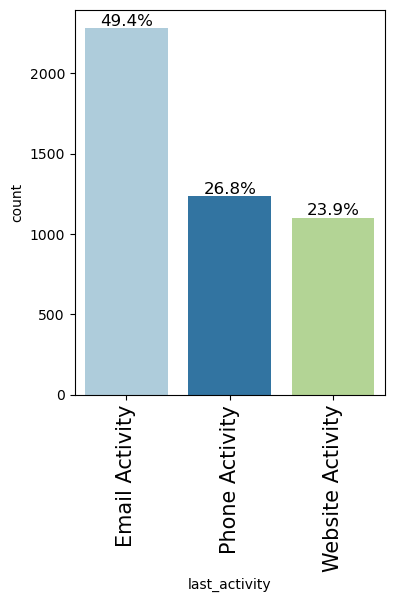

In [25]:
labeled_barplot(df,'last_activity', perc=True)

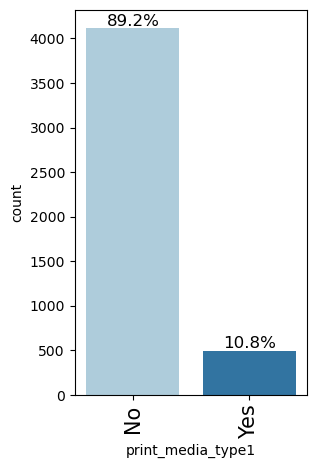

In [26]:
labeled_barplot(df,'print_media_type1', perc=True)

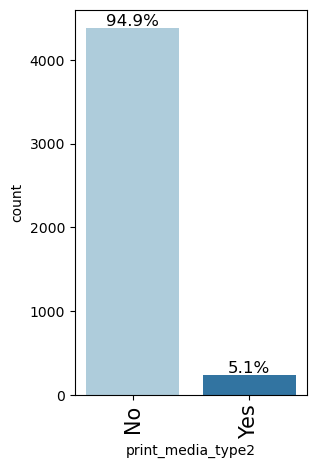

In [27]:
labeled_barplot(df,'print_media_type2', perc=True)

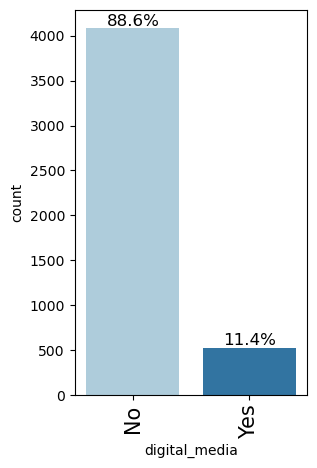

In [28]:
labeled_barplot(df,'digital_media', perc=True)

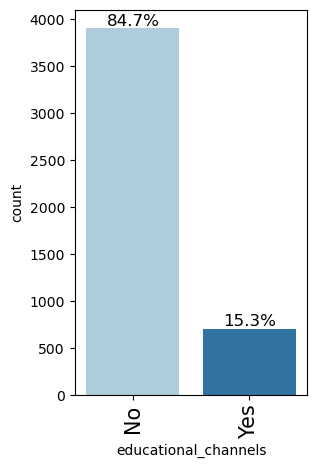

In [29]:
labeled_barplot(df,'educational_channels', perc=True)

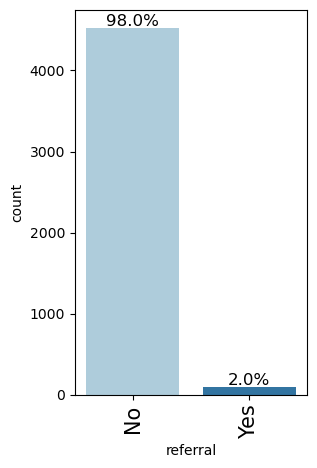

In [30]:
labeled_barplot(df,'referral', perc=True)

**Observations:**

- There are **56.7% Professionals, 31.2% Unemployed & 12% Students** under current_occupation category
- Users first interaction methods are **55.1% by Website and 44.8%** by mobile app. So mostly similar effect
- Users Profile completed are mostly **High and Medium with 49.1% & 48.6%, only 2.3% customers have low profile completed status.**
- Users last activity are done via **email with 49.5% followed by Phone with 26.8% & Website with 23.9%**
- Print media type(1: News paper, 2: Magazine) seen by **~11% & ~5%** of the users.
- **Digital media ads are only seen by ~11% of the customers**
- **Educational channel had a effect on ~15% of the customers**
- Only 2% ocustomers were referred.


## Bivariate Analysis

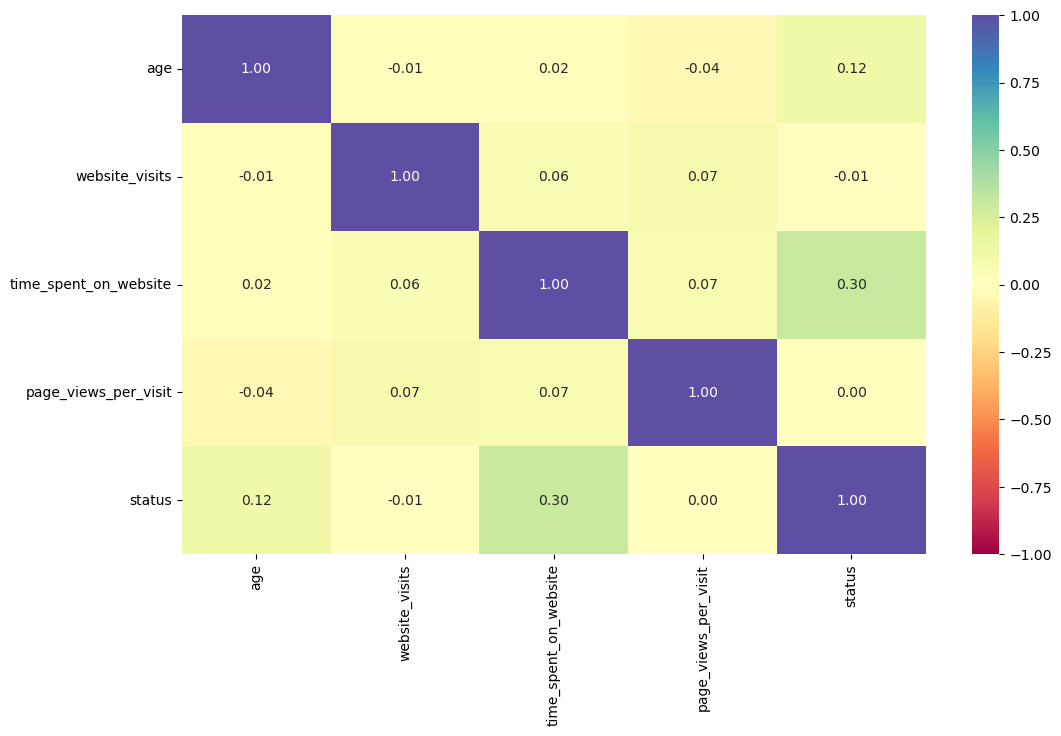

In [31]:
# Finding the correlation between various numerical columns of the dataset
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:** 
- The heatmap shows that there is **no major correlation between variables**.
- The continuous variables show no correlation with the target variable (status) except a slight correlation with time_spent_on_website, which indicates that the **categorical variables might be more important for the prediction.**

In [32]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()


In [33]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


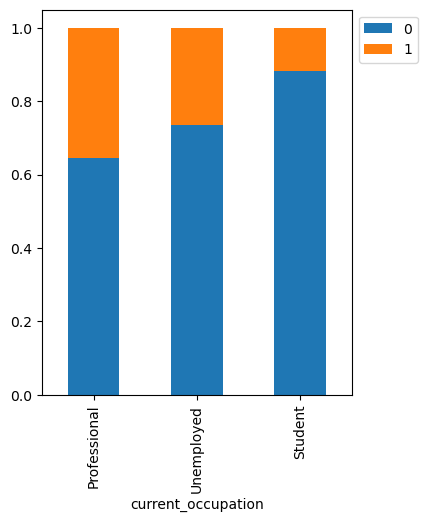

In [34]:
stacked_barplot(df, 'current_occupation', 'status')

## Age range for potential lead Customers

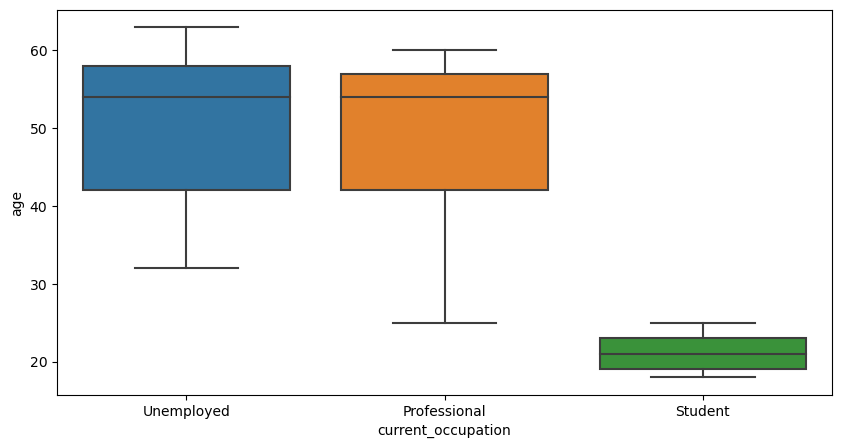

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='current_occupation', y='age')
plt.show()

In [36]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**
- Of all customers **current professionals are most engaged and converted to paid customers followed by Unemployed & student**.
- Current professional & Unemployed customers **median age is same i.e. 54** & student median age is **21**
- This would suggest the **Current professional are looking for career change or promotions** & **Umemployed and students are looking for high paying job**

### The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 

**Let's analyze first_interaction interaction methods**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


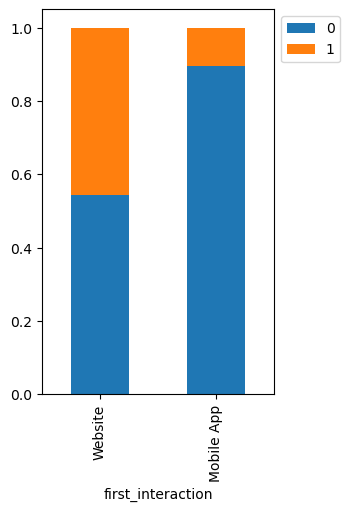

In [37]:
stacked_barplot(df, "first_interaction", "status")

**Obervations:**

- For the first channel of interaction with **Website most of the leads became paid customers** compared to Mobile App

### The company uses multiple modes to interact with prospects. Which way of interaction works best?

**Let's analyze all modes of user interaction methods**

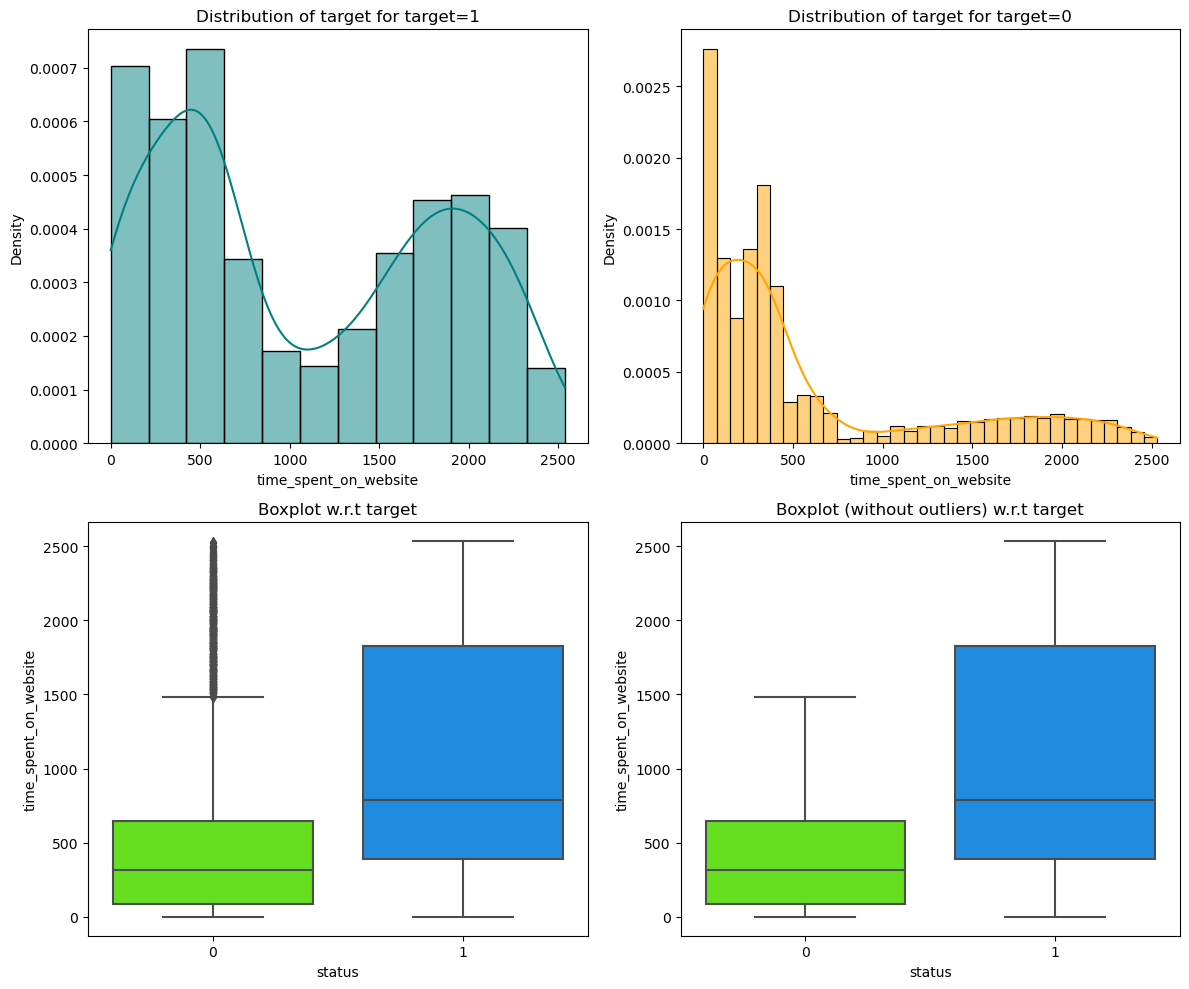

In [38]:
# Let's Analyze time_spent_on_website mode
distribution_plot_wrt_target(df, "time_spent_on_website", "status")

In [39]:
# checking the median value
df.groupby(["status"])["time_spent_on_website"].median()

status
0    317.0
1    789.0
Name: time_spent_on_website, dtype: float64

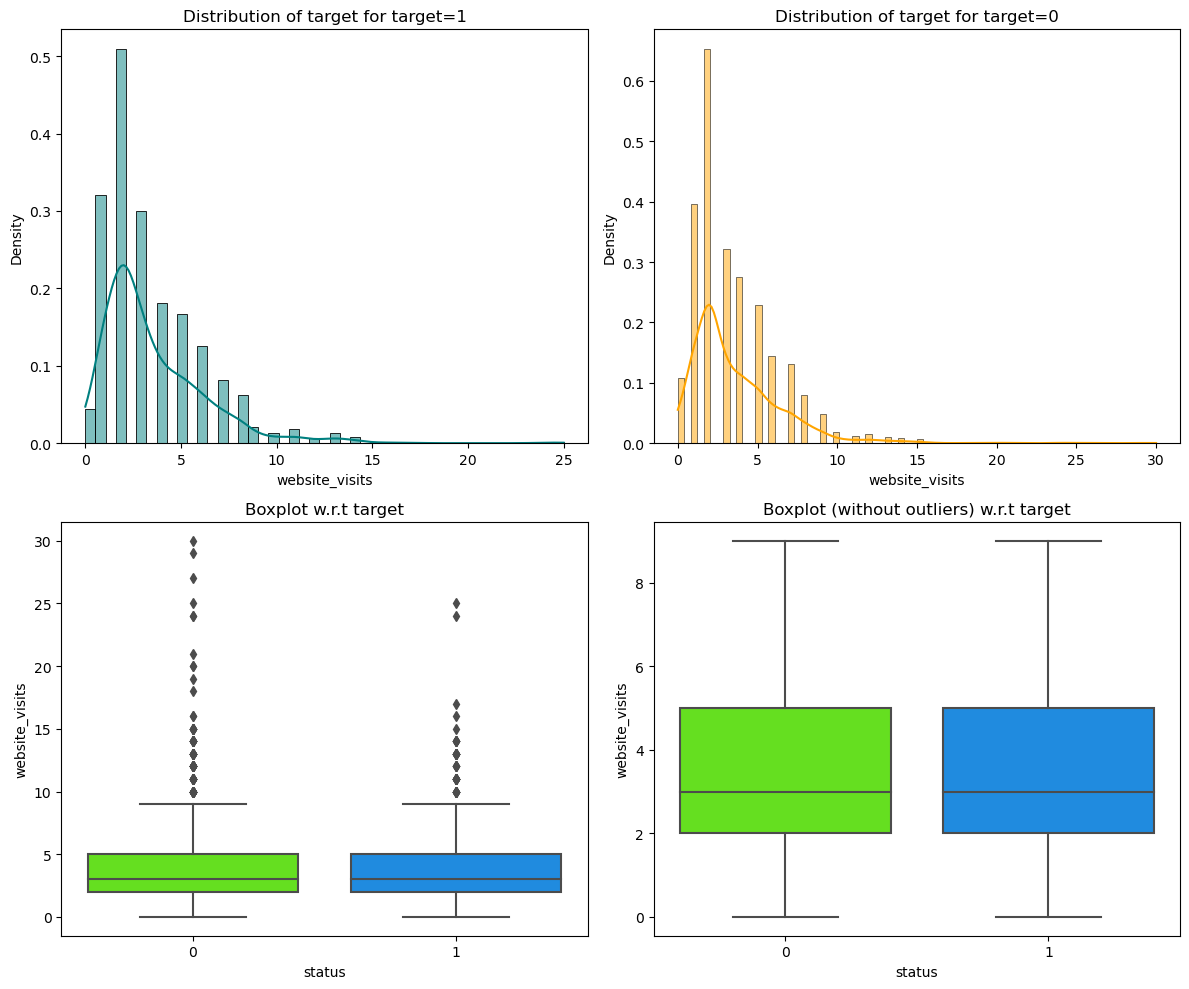

In [40]:
# Let's Analyze website_visits mode
distribution_plot_wrt_target(df, "website_visits", "status")

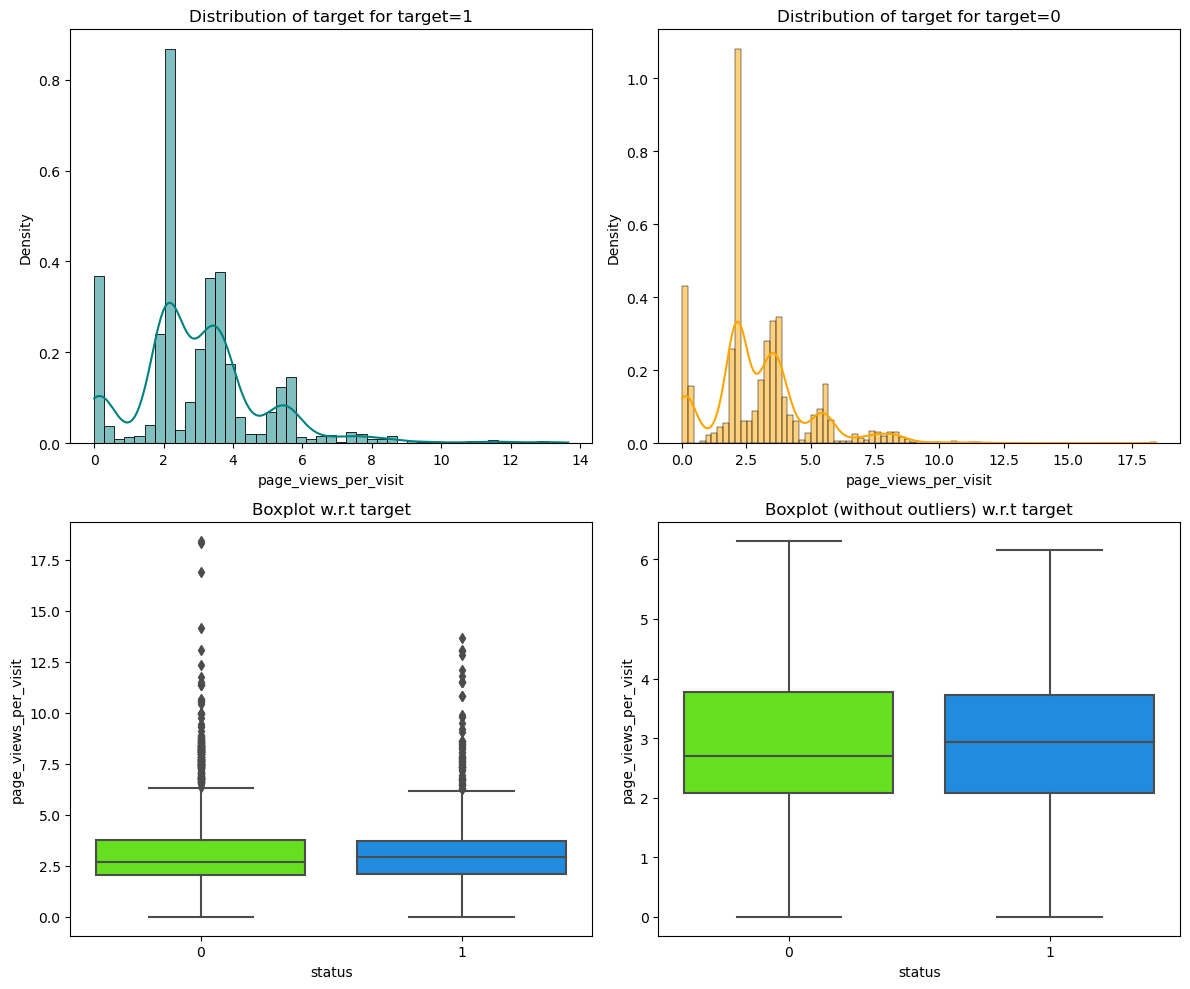

In [41]:
# Let's Analyze page_views_per_visit mode
distribution_plot_wrt_target(df, "page_views_per_visit", "status")

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


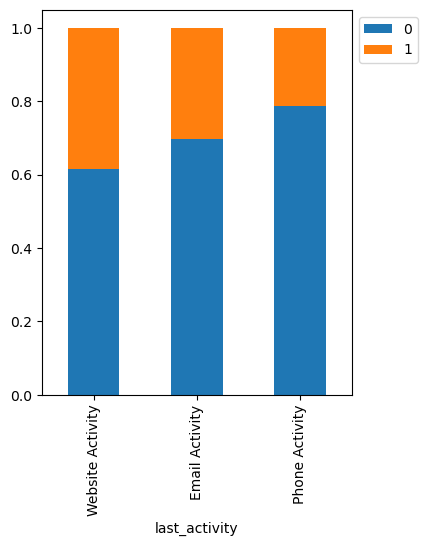

In [42]:
# Let's Analyze last activity mode
stacked_barplot(df, "last_activity", "status")

**Observations:**

- **Website visit & page views per visit count are same for paid customer vs regular customer**. So does not pay an important role user.
- if the last user interaction was **website activity then there is convertion rate of ~38% vs email of ~30% vs Phone of ~21%.**
- So **Website convertion rate** is more effective last user activity & should be promoted.
- **Time spent on website is very effective as well**. There is a pattern for the converted users spening mostly 789 seconds.

### The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Let's analyze all channels such as print media, digital media, referrals, etc**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


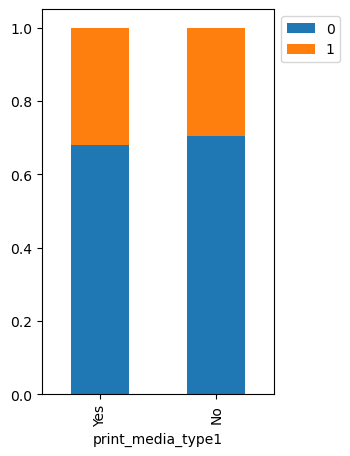

In [43]:
# Let's Analyze Print Media type 1 channel
stacked_barplot(df, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


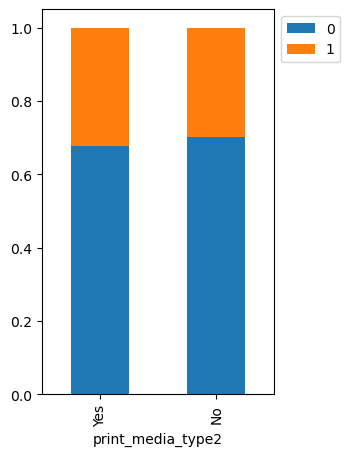

In [44]:
# Let's Analyze Print Media type 2 channel
stacked_barplot(df, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


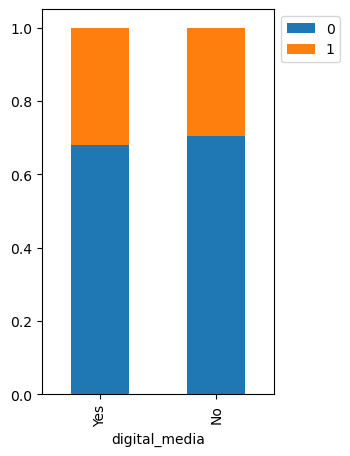

In [45]:
# Let's Analyze digital media channel
stacked_barplot(df, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


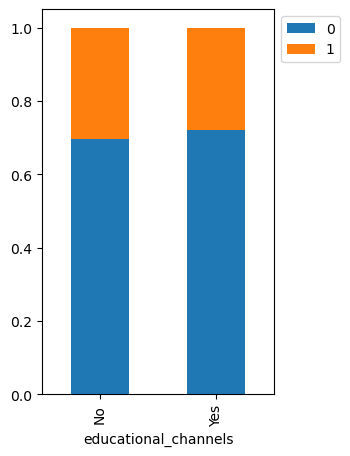

In [46]:
# Let's Analyze educational_channels
stacked_barplot(df, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


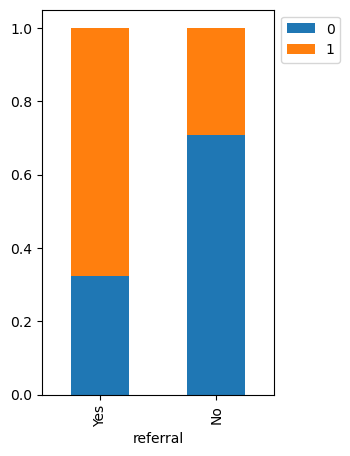

In [47]:
# Let's Analyze referral channel
stacked_barplot(df, "referral", "status")

**Observations:**

- **Print Media Type 1, Print Media Type 2 lead conversion rate is similar around ~31 to ~32%** & has **no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Digital Media lead conversion rate is ~32% & has no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Educational Channel conversion rate is ~28% & has no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Referral convertion rate is ~68 %** compared to 29% convertion rate those who are not referrred so referral is the **most effective channel.**. 
- However vey less referral are made, so **referral incentives should be given more** for more lead convertion.

### People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Let's analyze profile completed effect on convertion rate**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


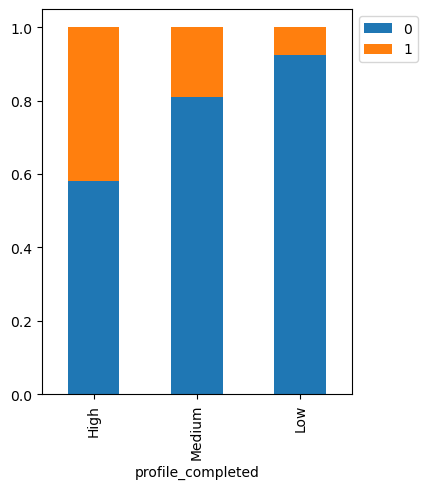

In [48]:
# Let's Analyze referral channel
stacked_barplot(df, "profile_completed", "status")

**Observations:**
 
- Users with **highest profile completed convertion is maximum around ~42%**, followed by medium with ~19% and Low with ~7%

**Overall observations:**

**observation**
- The heatmap shows that there is **no major correlation between variables**.
- Of all customers **current professionals are most engaged and converted to paid customers followed by Unemployed & student**.
- Current professional & Unemployed customers **median age is same i.e. 54** & student median age is **21**
- This would suggest the **Current professional are looking for career change or promotions** & **Umemployed and students are looking for high paying job** 
- **Time spent on website is very effective as well.** There is a pattern for the converted users spening mostly 789 seconds.
- For the first channel of interaction with **Website most of the leads became paid customers** compared to Mobile App
- **Website visit & page views per visit count are same for paid customer vs regular customer**. So does not pay an important role user.
- if the last user interaction was **website activity then there is convertion rate of ~38% vs email of ~30% vs Phone of ~21%.**
- So **Website convertion rate** is more effective last activity
- **Print Media Type 1, Print Media Type 2 lead conversion rate is similar around ~31 to ~32%** & has **no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Digital Media lead conversion rate is ~32% & has no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Educational Channel conversion rate is ~28% & has no impact** in lead convertion as same number of leads are converted even if they did not access it.
- **Referral convertion rate is ~68 %** compared to 29% convertion rate those who are not referrred so referral is the **most effective channel.**
- Users with **highest profile completed convertion is maximum around ~42%**, followed by medium with ~19% and Low with ~7%

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

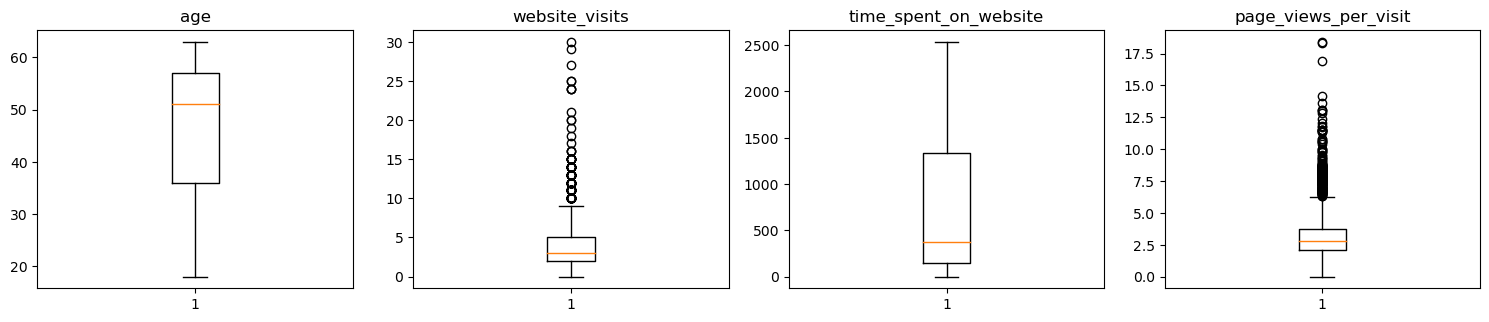

In [49]:
# outlier detection using boxplot
# dropping status as it is a target value
num_cols.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**
- There is **no missing** value found
- Outliers **detected for few columns**, however it should not impact prediction 
- Need to **encode categorical values** before model creation
- have to **split the data between 70:30 ratio** for train & test sample for model evaluation.


**Creating dummy variables for the categorical variables**

In [50]:
# Creating a list of columns for which we will create dummy variables
get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# create dummy variables
df = pd.get_dummies(data = df, columns = get_dummies_for, drop_first = True)

# mappping binary columns 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral' 
dict_print_media_type1 = {'Yes': 1, 'No': 0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}



df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)



In [51]:
#verify dummy columns creation as needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   print_media_type1               4612 non-null   int64  
 5   print_media_type2               4612 non-null   int64  
 6   digital_media                   4612 non-null   int64  
 7   educational_channels            4612 non-null   int64  
 8   referral                        4612 non-null   int64  
 9   status                          4612 non-null   int64  
 10  current_occupation_Student      4612 non-null   uint8  
 11  current_occupation_Unemployed   4612 non-null   uint8  
 12  first_interaction_Website       46

### Separating the independent variables (X) and the dependent variable (Y)

In [52]:
# Separating the target variable and other variables
X = df.drop(['status'], axis=1)

Y = df['status']

In [53]:
# Splitting the data into 70% train and 30% test set

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [54]:
print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0    0.701363
1    0.298637
Name: status, dtype: float64
Percentage of classes in test set:
0    0.70159
1    0.29841
Name: status, dtype: float64


## Building a Decision Tree model

### **Model evaluation criterion**

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer. 

### Which case is more important? 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

### Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [55]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    plt.show()

In [56]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

We will be building 2 different models:

- **Decision Tree**
- **Random Forest**
* We will build our model using the **DecisionTreeClassifier function.**
* If the frequency of class 1 is 30% and the frequency of class 0 is 70%, then class 0 will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.70, 1:0.30} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [57]:
# frequency of Status classes
df['status'].value_counts(normalize = True)



0    0.701431
1    0.298569
Name: status, dtype: float64

### Decision Tree Model creation

In [58]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight={0 : 0.70, 1:0.30}, random_state=1)

In [59]:
# Fitting the decision tree
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

## Decision Tree Model Performance evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



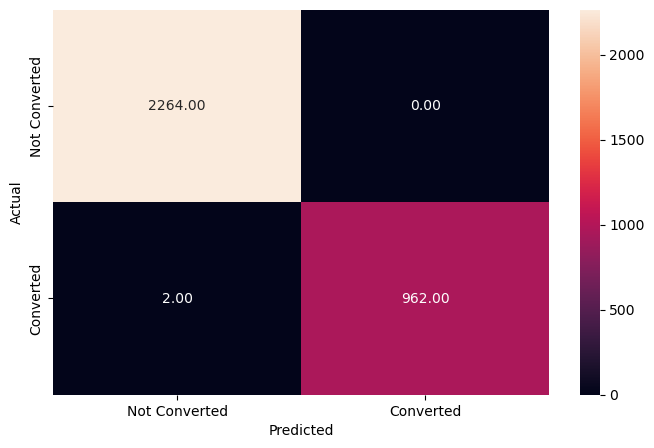

In [60]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving almost **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       971
           1       0.65      0.69      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.77      0.76      1384
weighted avg       0.80      0.80      0.80      1384



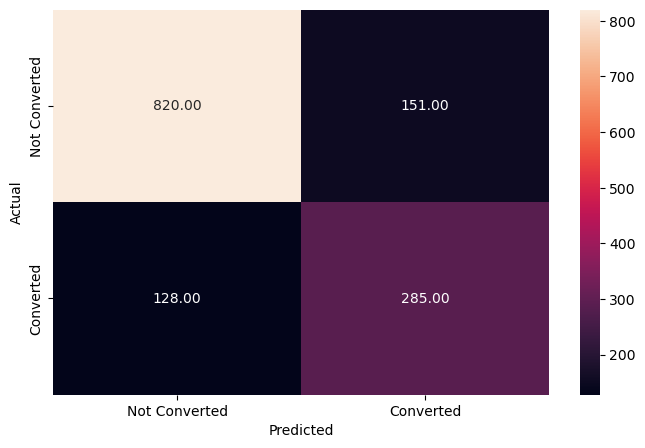

In [61]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [62]:
dtree_test = model_performance_classification(dt, x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.759324,0.767281,0.79841


**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.76 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 25% (1 - 0.75) chance that the model will predict that a lead is **not going to get converted even though he/she gets converted**, and **the company may waste their time and energy on these customers who are going to get converted anyways.**

**Let's plot the feature importance and check the most important features.**

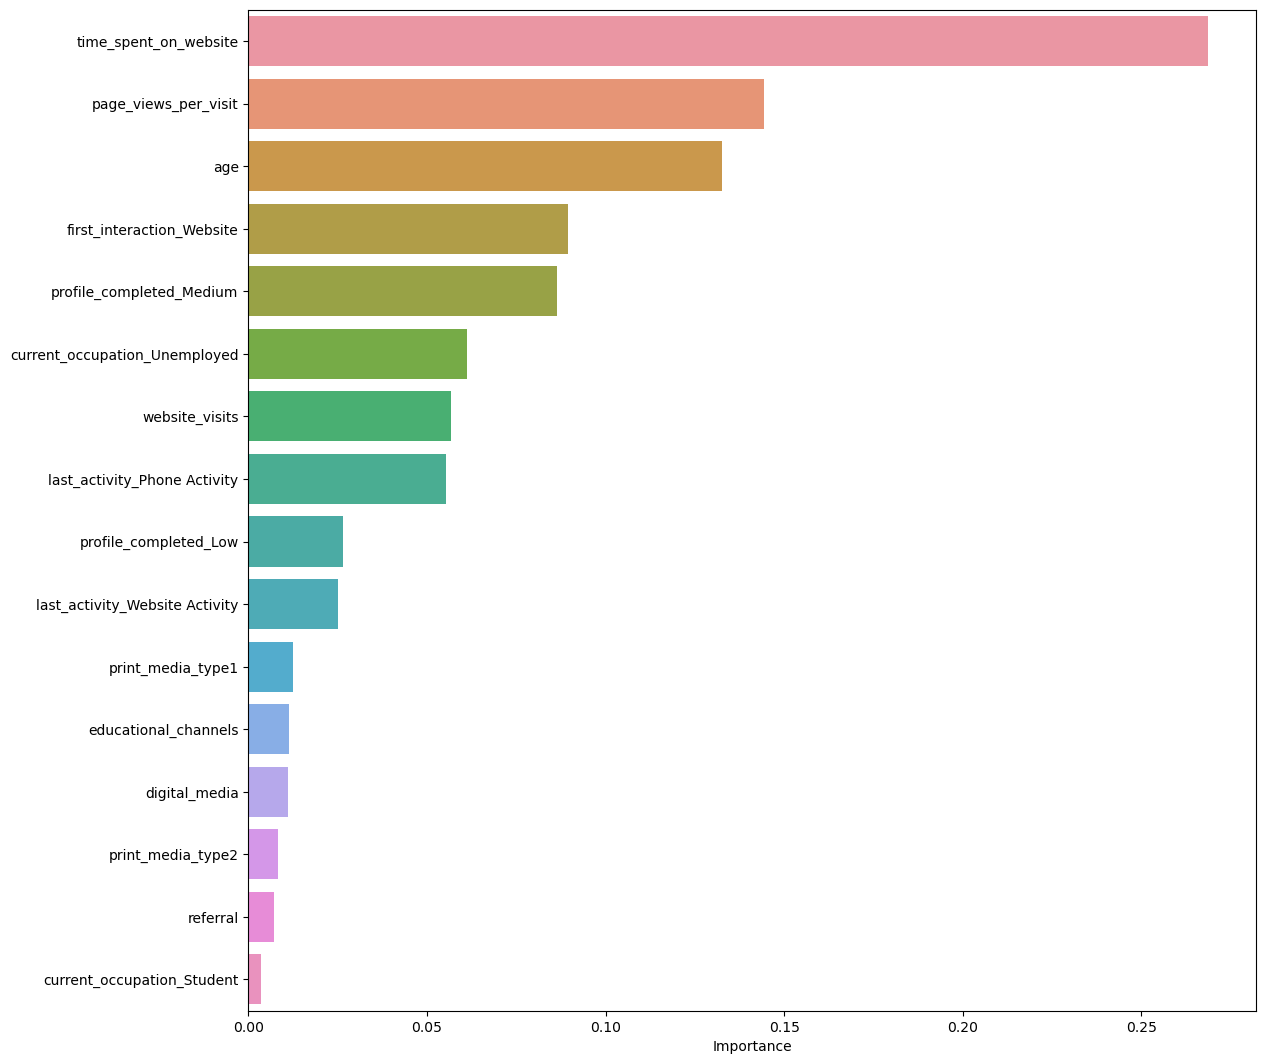

In [63]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations:**

- According to the Decision Tree, **time_spent_on_website is the most important feature, followed by page_views_per_visit, age, first_interaction_Website & Profile completed Medium.**
- This means that customers who are not getting converted are **not spending much time on websites** & not updating their profiles.
- Also customers who are **unemployed have more chances of getting conerted and need to be prioritized more.**

### Tuning Desision Tree Model

**Let's try to tune the model and check if we could improve the results.**

In [64]:
# Choose the type of classifier & switch the class weight to increase class one priority
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

Let's test the tuned model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



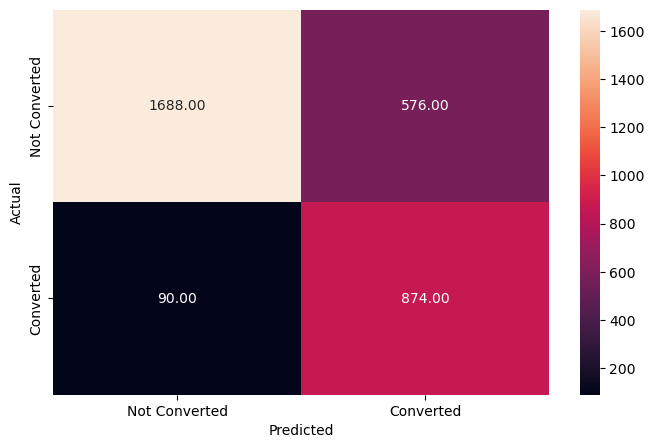

In [65]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



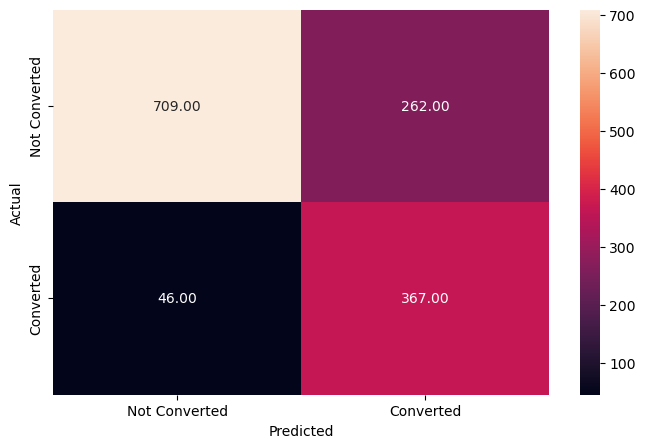

In [66]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [67]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.761269,0.809397,0.777457


**Observations:**

- The tuned model is performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone up slightly from .75 to .76 as well as Recall from .76 to .81

**Let's look at the feature importance of this model and try to analyze why this is happening.**

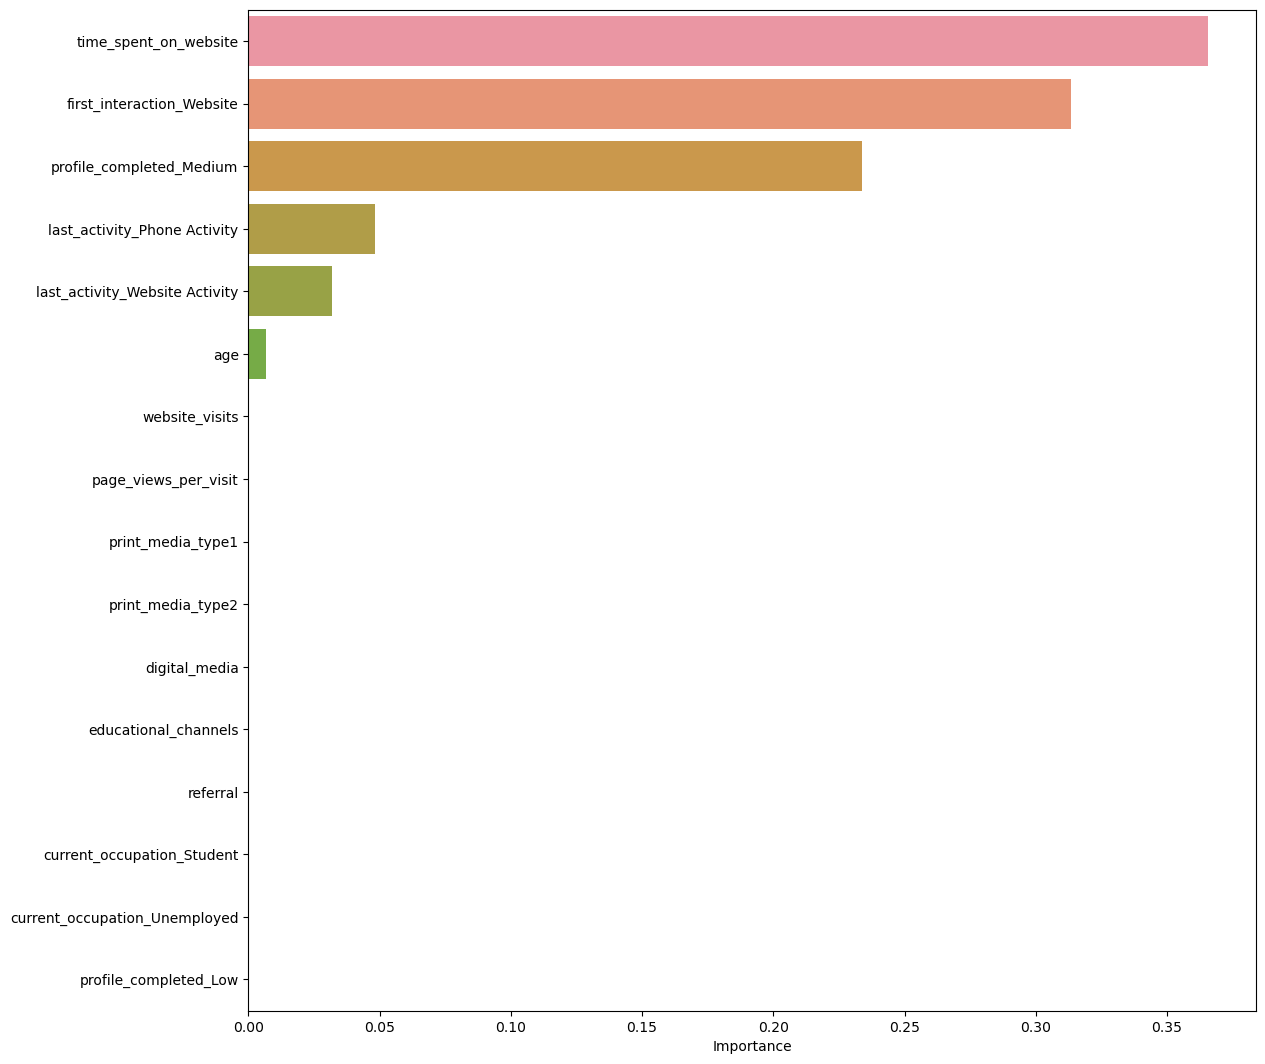

In [68]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observations:**

- After tuning the model we are getting that only 6 features are important.It seems like the model is having some bias, as it has simplified the problem and is capturing the patterns associated only with top 6 variables and does not consider others.
- According to this model  **'time_spent_on_website', 'first_interaction_Website', and 'profile_completed_medium'** are common 3 most important features that can get potentential leads to get converted.
- Interestingly it has removed 'page_views_per_visit' variable from the model.

**Let's plot the tree** and check if the assumptions about overtime income.

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

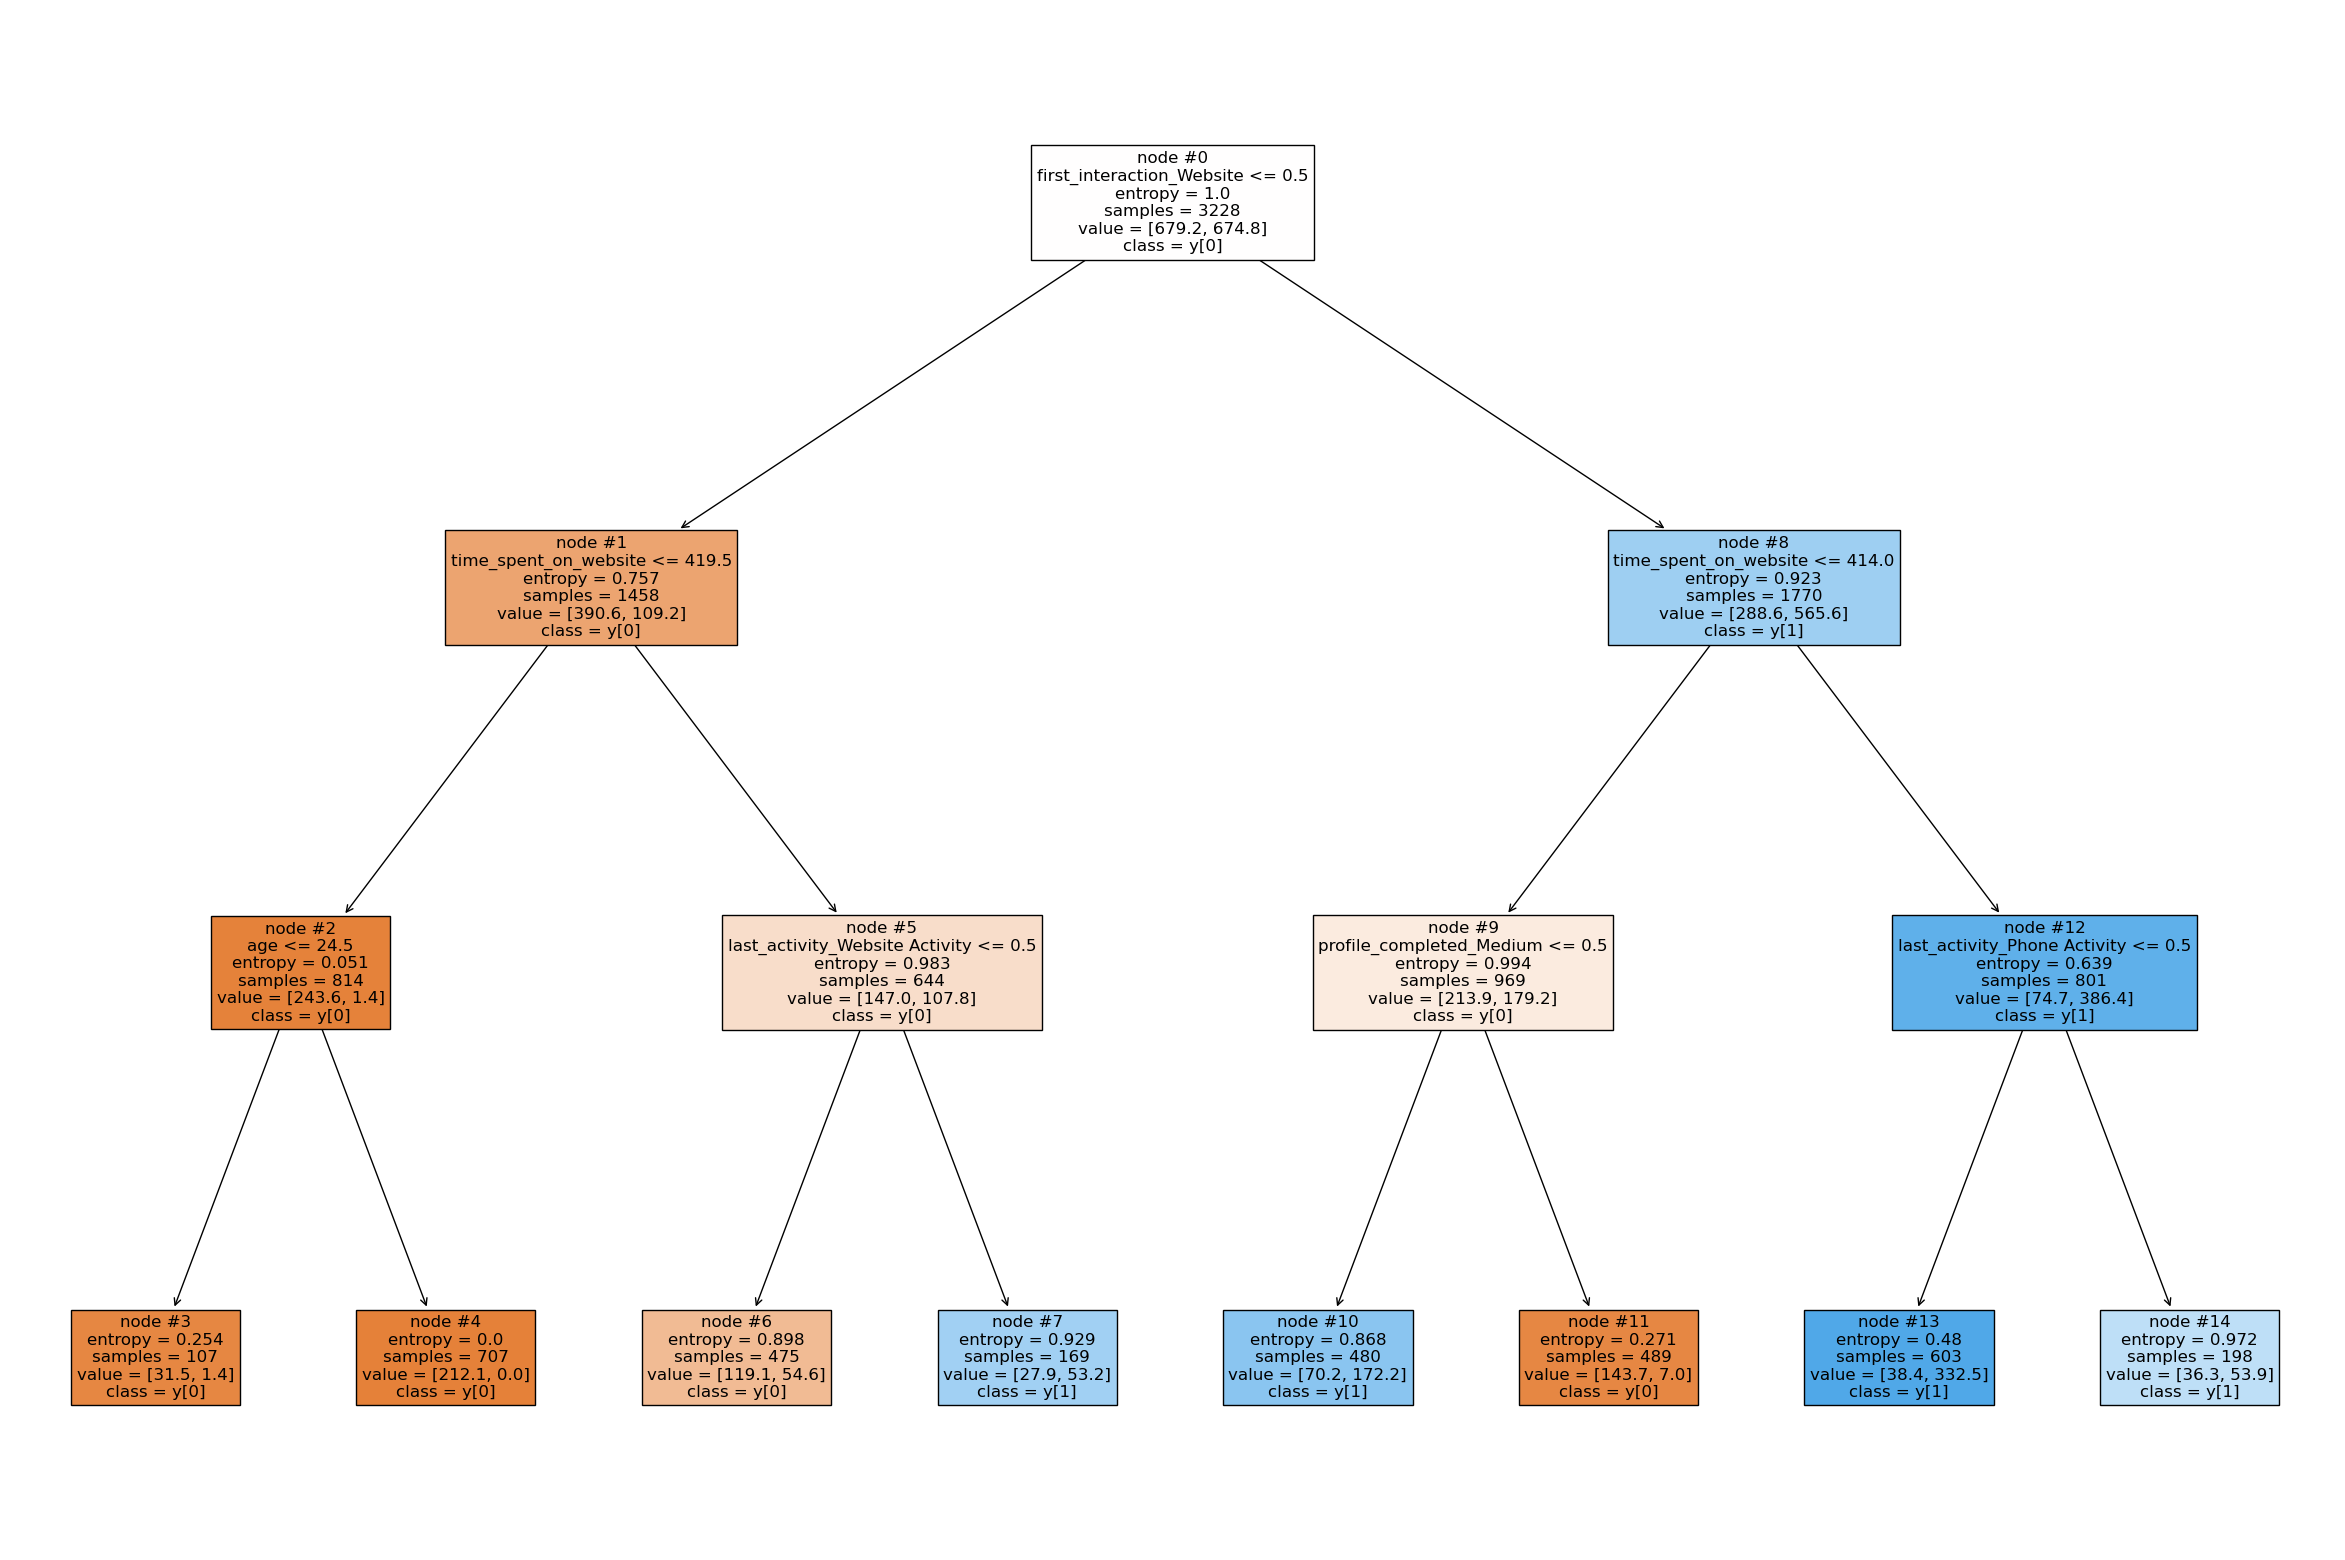

In [69]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [70]:
print(tree.export_text(dtree_estimator, feature_names=x_train.columns.tolist(), show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [31.50, 1.40] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [212.10, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [119.10, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 53.20] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 414.00
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [70.20, 172.20] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [143.70, 7.00] class: 0
|   |--- time_spent_on_website >  414.00
|   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |--- weights: [38.40, 332.50] class: 1
|   |   |--- last_activity_Phone Activity >  0.50
|   |   |   |--- weights: [36.30, 53.90] class: 1



**Observations:**

Blue leaves represent the paid customer class, i.e., **y[1]** and the orange leaves represent the un-paid customer, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

- Customers whose first interaction is via the Website, who spend more than 419.5 seconds, last activity was not via the website but rather by phone or email will become paid customers.
- Customers whose first interaction is via the Website, who spend less than 414.0 seconds with a medium profile updated ended up being paid customers.
- So user communication via phone & email should be encouraged for the lead to get converted to paid customers.
- Customer spending more than 414 seconds, however not completing their profile will not get converted. 
- So the website must be designed to make sure that the customers are engaged & motivated to update their profile upfront, for them to see their growth impact effectively.
- Customers spending less than 419.5 seconds and below 25 years of age, mostly students, do not convert as paid customers.
- So maybe the management must think to provide some student discount so that they can afford the course fee.



## Building a Random Forest model

In [71]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



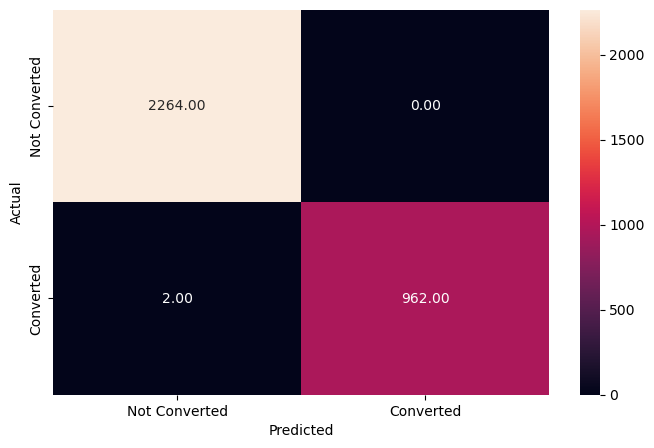

In [72]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.77      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



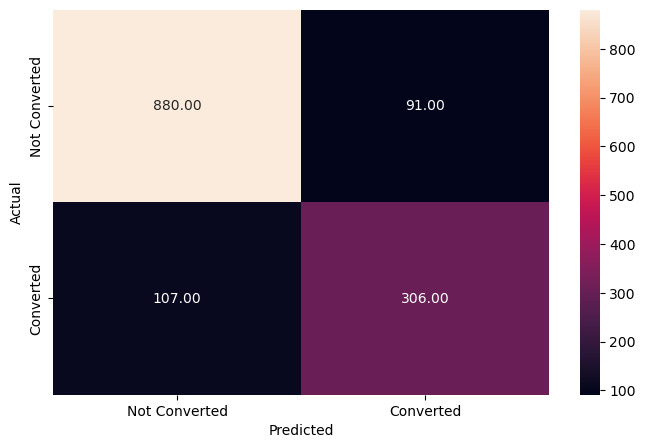

In [73]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [74]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.831186,0.823601,0.856936


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.74 for class 1.
- Precision is high for the test data as well.

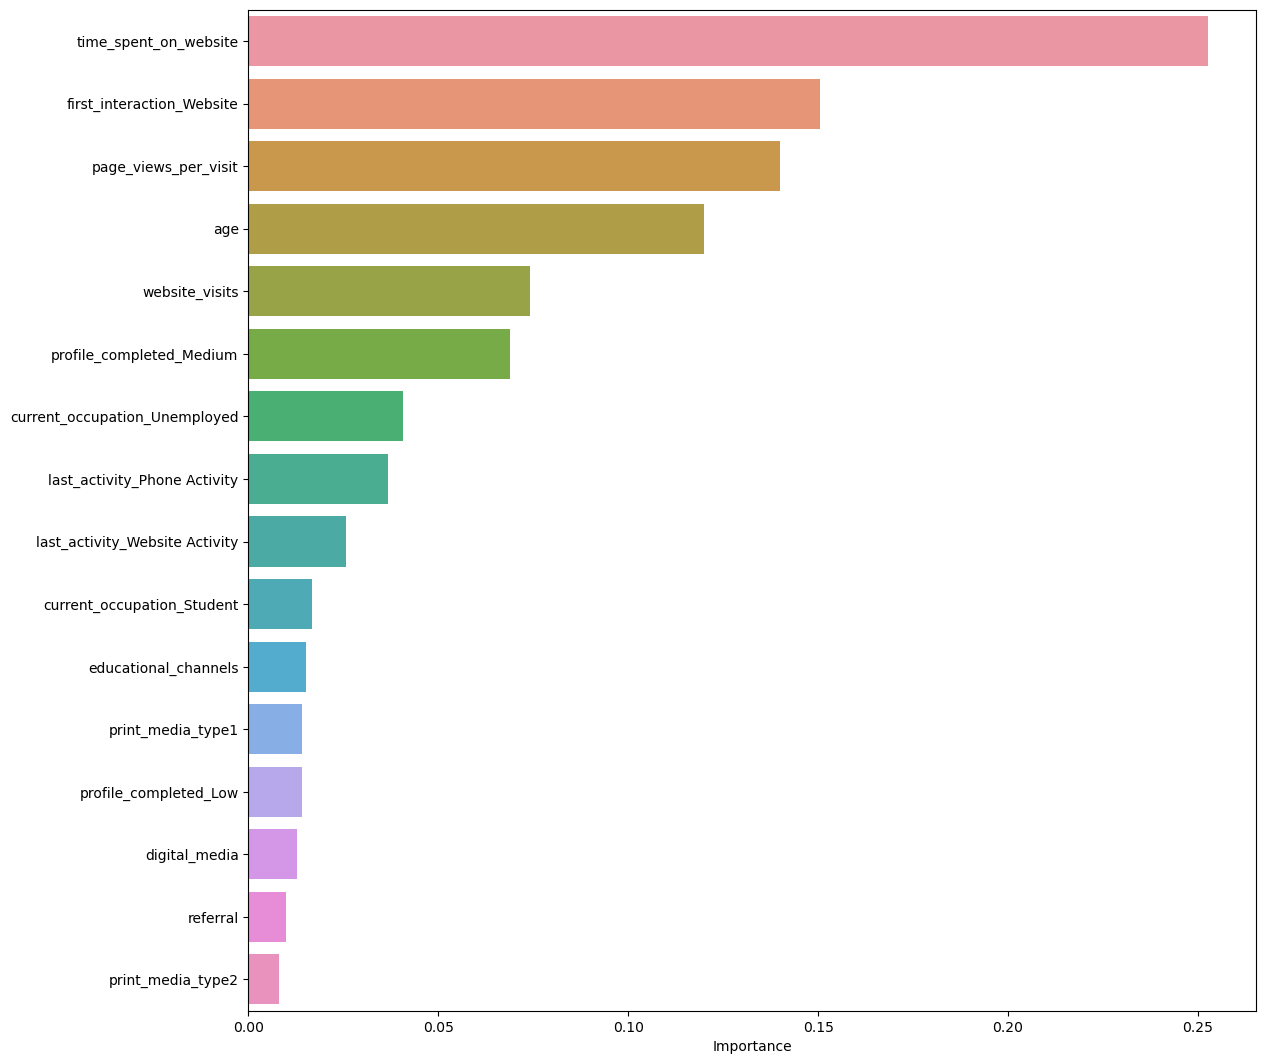

In [75]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

**Observations:**


- According to this model  **'time_spent_on_website', 'first_interaction_Website', and 'profile_completed_medium'** are common 3 most important features with the tuned Decision tree
- However it also includes **page_views_per_visit, age, current_occupation & website_visit** as well.
- The Random Forest further verifies the results from the previous decision tree for the most important features.


## Model Performance evaluation and improvement

**Tuning the Random Forest classifier**

In [76]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3},criterion="entropy", random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 150, 200],
        #"max_depth": [6, 7],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.8, 0.9],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [77]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
                       max_features=0.8, n_estimators=200, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



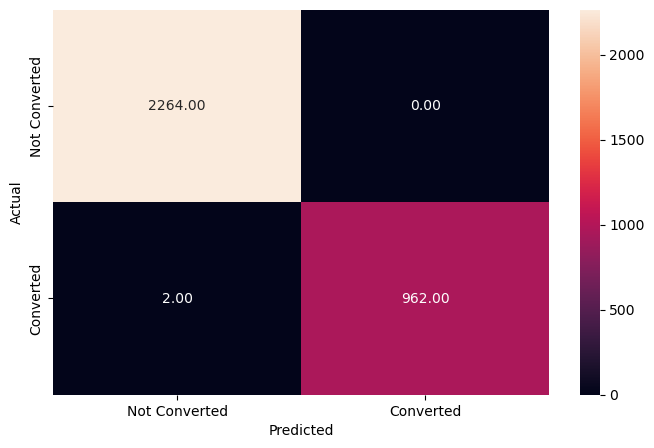

In [78]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       971
           1       0.75      0.74      0.75       413

    accuracy                           0.85      1384
   macro avg       0.82      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



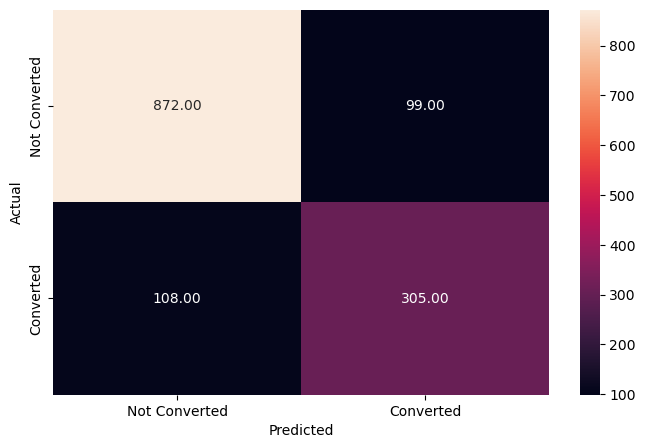

In [79]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [80]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.822373,0.818271,0.850434


<Axes: xlabel='Importance'>

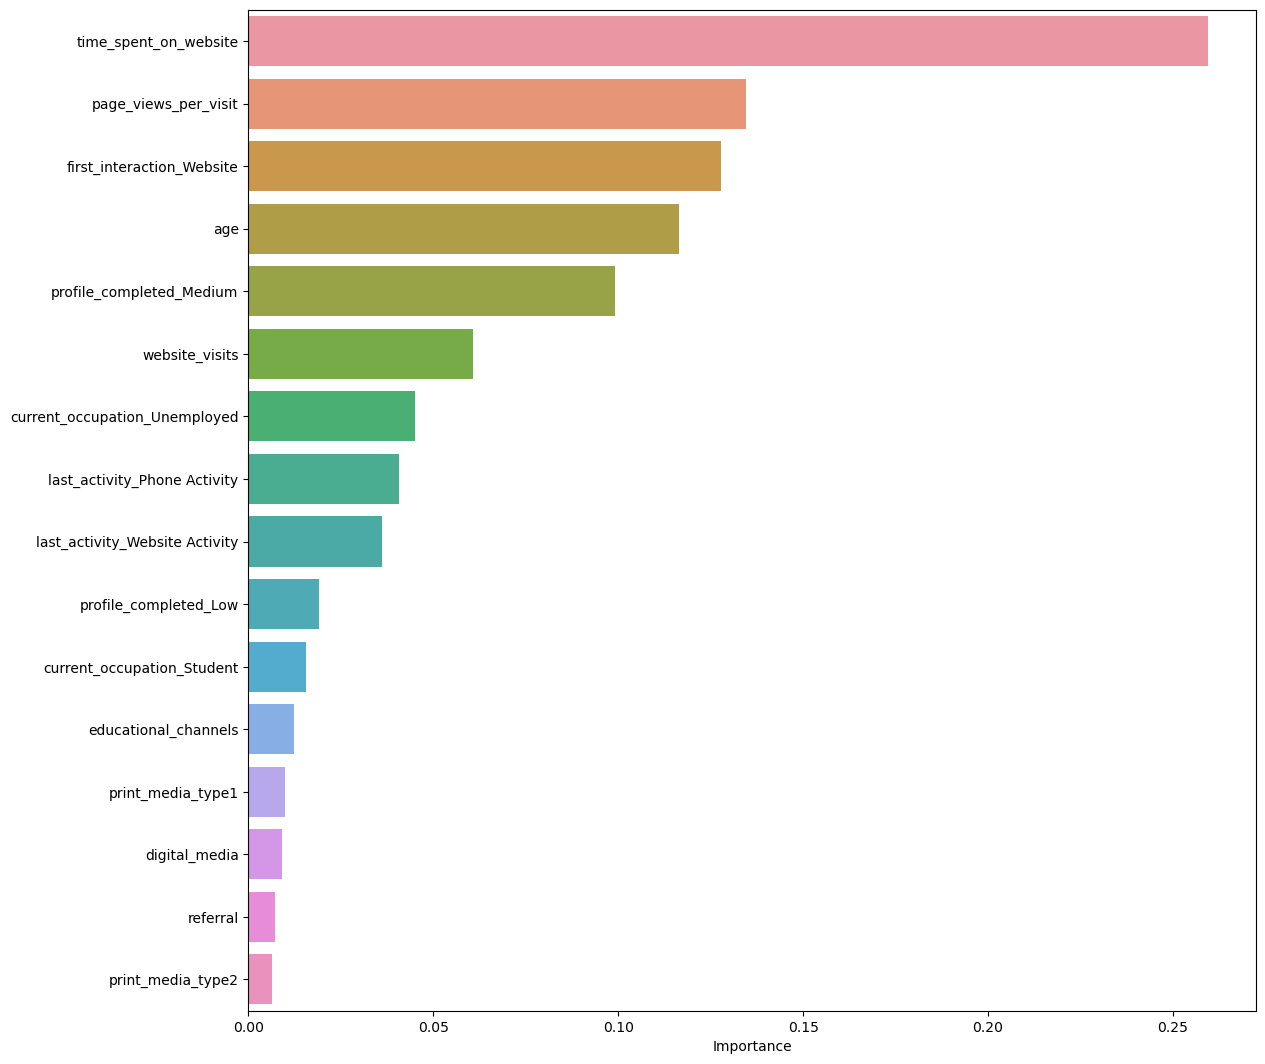

In [81]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

**Observations:**

- According to this model also **'time_spent_on_website', 'page_views_per_visit','first_interaction_Website','age', 'profile_completed_medium', 'website_visit' & 'current_occupation'** are more consistent important features
- The tuned Random Forest classifier model further verifies the results from the previous decision tree for the most important features.

### Comparison of all the models we have built so far

In [82]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier"
    
]

print("Test performance comparison:")

Test performance comparison:


In [83]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.759324,0.761269,0.831186,0.822373
Recall,0.767281,0.809397,0.823601,0.818271
Accuracy,0.798410,0.777457,0.856936,0.850434


**Observations:**

- **The Random Forest classifier** gives the best performance for this dataset.


## Actionable Insights and Recommendations

### Actionable Insights:

- According to the **best model Random Forest Classifier**, **time_spent_on_website, first_interaction_Website, page_views_per_visit, age, Website_visits & Profile completed Medium and current_occupation_unemployed** are the most important features
- This means that customers **who are not getting converted are not spending much time on websites & not updating their profiles.**
- Customers who spend more than **419.5 seconds**, and interact by **phone or email** will become paid customers. 
- Customers spending **less than 414.0 seconds however with a medium profile updated ended up being paid customers.** 
- Customer spending **more than 414 seconds, however not completing their profile will not get converted.** 
- Customers spending **less than 419.5 seconds and below 25 years of age, mostly students, do not convert as paid customers.**

### Recommendations

- **Customers who are unemployed have more chances of getting converted and need to be prioritized more.**
- Customer **communication via phone & email should be encouraged for the lead to get converted to paid customers.**
- The **website must be designed to make sure that the customers are engaged & motivated to update their profile upfront, for them to see their growth impact effectively.**
- Customers spending less than 419.5 seconds and below 25 years of age, mostly students, do not convert as paid customers.
  **So maybe the management must think to provide some student discount or introduce course fee payment installment options, so   that they can afford the course fee**
- The **mobile app is not as effective as the website**, so the app development team must work on making it more user-friendly and intuitive.
- Most of the **referral customers end up as paid customers, so referrals must be encouraged by giving future course discounts or gift vouchers**.
- All the less important features(**print_media_type2, referral, digital_media, profile completed low,print_media_type1**) **should be thought through and marketed well**, so that it generates more visibility targetted towards **current professional & unemployed customers**